In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim


import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5,0.5,0.5))
])

In [3]:
DATA_PATH = "../convolutional_neural_nets/Data/"
dataset = ImageFolder(DATA_PATH, transform=transform)
dataLoader = DataLoader(dataset, batch_size=16, shuffle=True)

In [4]:
print(dataLoader.dataset[0][0])

tensor([[[-0.1922, -0.0980, -0.1137,  ..., -0.0118,  0.0745,  0.1059],
         [-0.1294, -0.1843, -0.2078,  ..., -0.0431,  0.0353,  0.0275],
         [-0.0824, -0.1216, -0.1059,  ...,  0.2706,  0.2863,  0.1294],
         ...,
         [-0.0353, -0.0745, -0.0431,  ..., -0.5843, -0.5059, -0.4510],
         [-0.0902, -0.1137, -0.0745,  ..., -0.6549, -0.6549, -0.6157],
         [-0.1373, -0.1529,  0.0196,  ..., -0.6235, -0.6627, -0.7020]],

        [[-0.8510, -0.8902, -0.9216,  ..., -0.4196, -0.4431, -0.4510],
         [-0.8039, -0.8824, -0.9451,  ..., -0.5059, -0.5059, -0.5294],
         [-0.7647, -0.8431, -0.8745,  ..., -0.3020, -0.3725, -0.4980],
         ...,
         [-0.1294, -0.1765, -0.2000,  ..., -0.6471, -0.5765, -0.5451],
         [-0.2235, -0.2471, -0.3255,  ..., -0.7098, -0.7176, -0.6863],
         [-0.2235, -0.2706, -0.2784,  ..., -0.6784, -0.6941, -0.7333]],

        [[-0.0431,  0.0745,  0.0275,  ..., -0.0353,  0.0588,  0.1294],
         [ 0.0588, -0.0275, -0.0902,  ..., -0

/tmp/ipykernel_11422/3944742262.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  plt.imshow(dataLoader.dataset[0][0].T)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


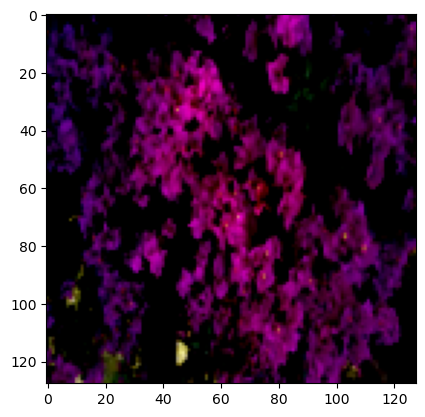

In [5]:
plt.imshow(dataLoader.dataset[0][0].T)

In [6]:


class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), 
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 16, 3, padding=1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.block = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(16, 32, 3, padding=1),  
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(64, 3, 3, padding=1),
            nn.Sigmoid() 
        )

    def forward(self, x):
        return self.block(x)


x = torch.randn(1, 3, 128, 128)
encoder = Encoder()
decoder = Decoder()

z = encoder(x)
print("Encoded shape:", z.shape)  

reconstructed = decoder(z)
print("Decoded shape:", reconstructed.shape) 


Encoded shape: torch.Size([1, 16, 16, 16])
Decoded shape: torch.Size([1, 3, 128, 128])


In [7]:
class Encoder2(nn.Module):
    def __init__(self):
        super(Encoder2, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(3, 128, 3, padding = 1),
            nn.ReLU(inplace  = True),
            nn.Conv2d(128, 64, 3, padding = 1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace = True),
            nn.Conv2d(64, 32, 3, padding = 1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace = True),
            nn.Conv2d(32, 16, 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.Conv2d(16, 16, 3, padding = 1),
            nn.ReLU(inplace = True)
        )
    def forward(self, x):
        return self.block(x)

class Decoder2(nn.Module):
    def __init__(self):
        super(Decoder2, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(16, 16, 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.Conv2d(16, 32, 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.Upsample(scale_factor = 2, mode = 'nearest'),
            nn.Conv2d(32, 64, 3, padding = 1),
            nn.ReLU(inplace= True),
            nn.Upsample(scale_factor = 2, mode = 'nearest'),
            nn.Conv2d(64, 3, 3, padding = 1),
            nn.Tanh()
            
        )
    def forward(self, x):
        return self.block(x)

In [8]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder2()
        self.decoder = Decoder2()

    def forward(self, x):
        latent_repr = self.encoder(x)
        out = self.decoder(latent_repr)

        return latent_repr, out

In [9]:
auto_encoder = AutoEncoder()

In [10]:
auto_encoder

AutoEncoder(
  (encoder): Encoder2(
    (block): Sequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): ReLU(inplace=True)
      (5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): ReLU(inplace=True)
      (8): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
    )
  )
  (decoder): Decoder2(
    (block): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), pad

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
device

device(type='cuda')

In [13]:
auto_encoder.to(device)

AutoEncoder(
  (encoder): Encoder2(
    (block): Sequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): ReLU(inplace=True)
      (5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): ReLU(inplace=True)
      (8): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
    )
  )
  (decoder): Decoder2(
    (block): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), pad

In [14]:
optimizer = optim.Adam(auto_encoder.parameters(),lr = 0.01)
criterion = nn.MSELoss()

In [15]:
epochs = 15
for i in range(epochs):
    epoch_loss = 0
    for images, _ in dataLoader:
        images = images.to(device)

        optimizer.zero_grad()
        _, outputs = auto_encoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {i} loss: {epoch_loss/len(dataLoader)}")
        

Epoch 0 loss: 0.21871400332969168
Epoch 1 loss: 0.10481946559055992
Epoch 2 loss: 0.08631100618968839
Epoch 3 loss: 0.0840061682721843
Epoch 4 loss: 0.07220452861941379
Epoch 5 loss: 0.09565835932026738
Epoch 6 loss: 0.07236026365147985
Epoch 7 loss: 0.08193912065547446
Epoch 8 loss: 0.06851840286475161
Epoch 9 loss: 0.06692916656965794
Epoch 10 loss: 0.07258532989932143
Epoch 11 loss: 0.07237732766763023
Epoch 12 loss: 0.06527192518115044
Epoch 13 loss: 0.05646046364436979
Epoch 14 loss: 0.06475787067218967


In [16]:
test_folder = "./test_data/"
test_data = ImageFolder(test_folder, transform=transform)
test_loader = DataLoader(test_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


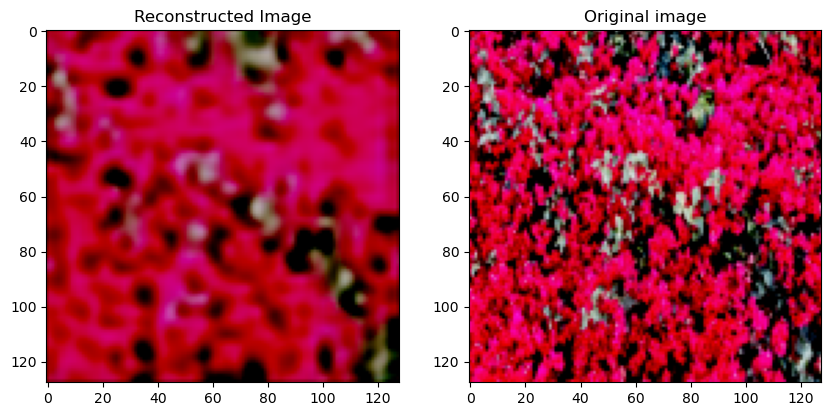

In [22]:
def show_imgs():
    with torch.no_grad():
        for images,_ in dataLoader:
            images = images.to(device)
            latent_repr, outputs = auto_encoder(images)
            output_img = outputs[0].cpu().permute(1, 2, 0).numpy()  # [C, H, W] → [H, W, C]
            #latent_img = latent_repr[0].cpu().permute(1, 2, 0).numpy() 
            original_img = images[0].cpu().permute(1, 2, 0).numpy() 
            
            fig, ax = plt.subplots(1, 2, figsize=(10, 6))
            
            #ax[0].imshow(latent_img)
            #ax[0].set_title("Latent Representation")
            ax[0].imshow(output_img)
            ax[0].set_title("Reconstructed Image")
            ax[1].imshow(original_img)
            ax[1].set_title("Original image")
            
    
            break 

show_imgs()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


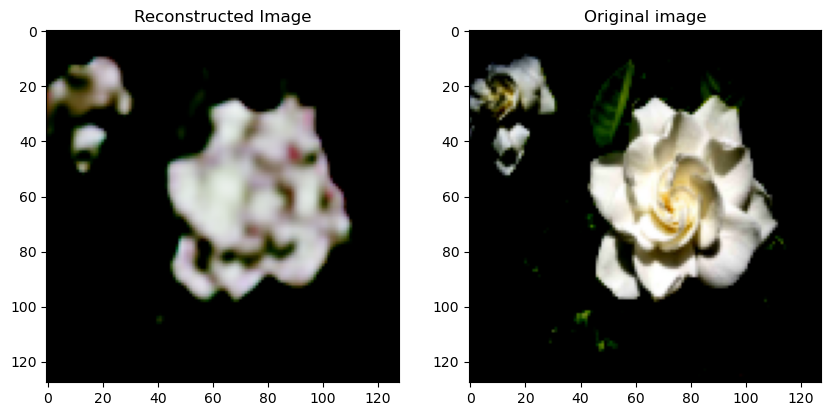

In [23]:
show_imgs()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


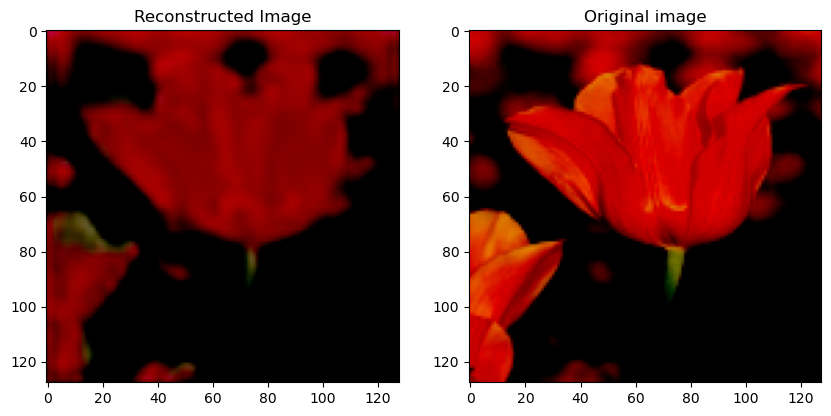

In [24]:
show_imgs()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


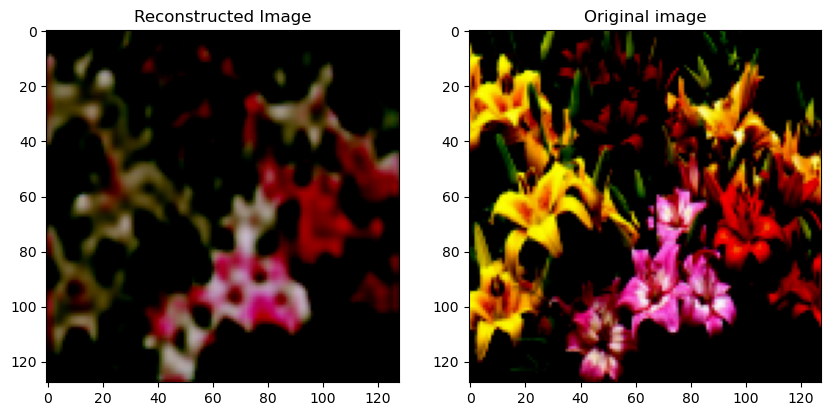

In [25]:
show_imgs()